# Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from scipy import stats
from sklearn import metrics
import glob
import csv
import os
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Check if GPU is available
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")
    
interesting_dir = "./Data/Fastest/"
#interesting_files = ["sit.csv", "stand.csv", "walk.csv"]
interesting_labels = ['stand', 'walk','jump','fall']
save_filename = "activity"

C:\Users\farha\anaconda3\envs\tensorflow_gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\farha\anaconda3\envs\tensorflow_gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\farha\anaconda3\envs\tensorflow_gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\farha\anaconda3\envs\tensorflow_gpu\l

Default GPU Device: /device:GPU:0


# Concate and label the raw data  

In [75]:
def data_concate_label(path,label):
    all_files1 = glob.glob(path + "/*.csv")
    
    li = []

    for filename in all_files1:
        df = pd.read_csv(filename, index_col=None, header=0)
        
        if 'label' in df.columns:
            pass
        else:df['label'] = str(label)
        li.append(df)
    frame = pd.concat(li, axis=0, ignore_index=True)
#     frame = frame.drop_duplicates()
    
    if len(df.columns) == 19 :
        new_header =['DATE','TIME','ax','ay','az','gx','gy','gz','lx','ly','lz','mx','my','mz','ma','mg','ml','mm','label']
    
    else :
       
        new_header =['DATE','TIME','ax','ay','az','gx','gy','gz','ma','mg','label']
#     if label == 'fall':
#         frame = frame.drop_duplicates()
        
#         frame = frame.query("mg >= 10 ")
#     if label =='jump':
        
#         frame = frame.query("mg <= 6")
    
#     else : pass
    frame = frame[:16000]
    
    print(frame.shape)
    print(len(df.columns))
    frame.to_csv("./Data/Fastest/activity_"+str(label)+".csv",index = False,header=new_header)
    

In [76]:
path1 = r".\Data\Fastest\stand"
label1 = "stand"
path2 = r".\Data\Fastest\walk_new"
label2 = "walk"
path3 = r".\Data\Fastest\jump_new"
label3 = "jump"
path4 = r".\Data\Fastest\Fall"
label4 = "fall"
data_concate_label(path1,label1)
data_concate_label(path2,label2)
data_concate_label(path3,label3)
data_concate_label(path4,label4)

(16000, 11)
11
(16000, 11)
11
(16000, 11)
11
(16000, 11)
11


# Concate all data into one .csv file

In [77]:
import copy

df = pd.DataFrame()
for i in range(len(interesting_labels)):
#     df_tmp = pd.read_csv(interesting_dir+save_filename+"_"+str(i+1)+'.csv',parse_dates=[['DATE', ' TIME']],header = 0)
    df_tmp = pd.read_csv(interesting_dir+save_filename+"_"+interesting_labels[i]+'.csv',header = 0)
    df = pd.concat([df, df_tmp])
    
print(len(df.columns))
# df['ts'] = df[['DATE_TIME']].apply(lambda x: x[0].timestamp(), axis=1).astype(int)
# df = df.assign(DATE_TIME=df['ts'])
# if len(df.columns) == 19 :
drop_list = ['DATE','TIME','ma','mg']
# else :pass

# drop_list = ['DATE','TIME','ma','mg']
df = df.drop(drop_list, axis=1)
df = df.dropna()

# df.rename(columns = {'DATE_TIME':'ts'}, inplace = True) 
all_data_filename = "total.csv"
df.to_csv(interesting_dir+all_data_filename)

# df.reset_index(inplace = True) 
df

11


ax        ay        az        gx        gy        gz  label
0      9.592826  2.708675  0.942772 -0.007327  0.045181 -0.400524  stand
1      9.592826  2.708675  0.942772 -0.050066  0.036633 -0.433494  stand
2      9.463613  2.718246  0.942772 -0.050066  0.036633 -0.433494  stand
3      9.463613  2.718246  0.942772 -0.051287  0.026864 -0.417620  stand
4      9.348758  2.675176  0.978664 -0.051287  0.026864 -0.417620  stand
...         ...       ...       ...       ...       ...       ...    ...
15995 -1.533799  0.641277  8.563912  0.768079 -0.536068  0.829134   fall
15996 -1.469193  0.636491  8.702696  0.768079 -0.536068  0.829134   fall
15997 -1.469193  0.636491  8.702696  0.638641 -0.700918  0.799828   fall
15998 -1.227518  0.701097  8.896515  0.638641 -0.700918  0.799828   fall
15999 -1.227518  0.701097  8.896515  0.446927 -0.732667  0.736330   fall

[64000 rows x 7 columns]

In [78]:
# normalize

# df[df.columns[:-1]] = df[df.columns[:-1]].apply(lambda x: (x - np.mean(x)) / (np.max(x) - np.min(x)))
# df

# Feature correlation (optional)

In [79]:
# use deepcopy to avoid other operation change value of df
df_cor = copy.deepcopy(df) 

features = df_cor.columns[0:-1]
df_cor["label"] = pd.factorize(df_cor.label)[0]
traindf = pd.DataFrame(df_cor,columns=features)
#print(df_cor["label"])
#print(traindf)

feature_name = list(traindf.columns)
print(feature_name)
y = df_cor['label']
X = traindf.copy()
X.isna().sum()
# X.dropna()
# X.fillna('mean')

['ax', 'ay', 'az', 'gx', 'gy', 'gz']


ax    0
ay    0
az    0
gx    0
gy    0
gz    0
dtype: int64

[0.19334284 0.19273012 0.19859631 0.1033801  0.123796   0.18815463]


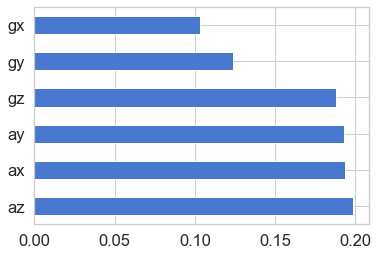

In [80]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

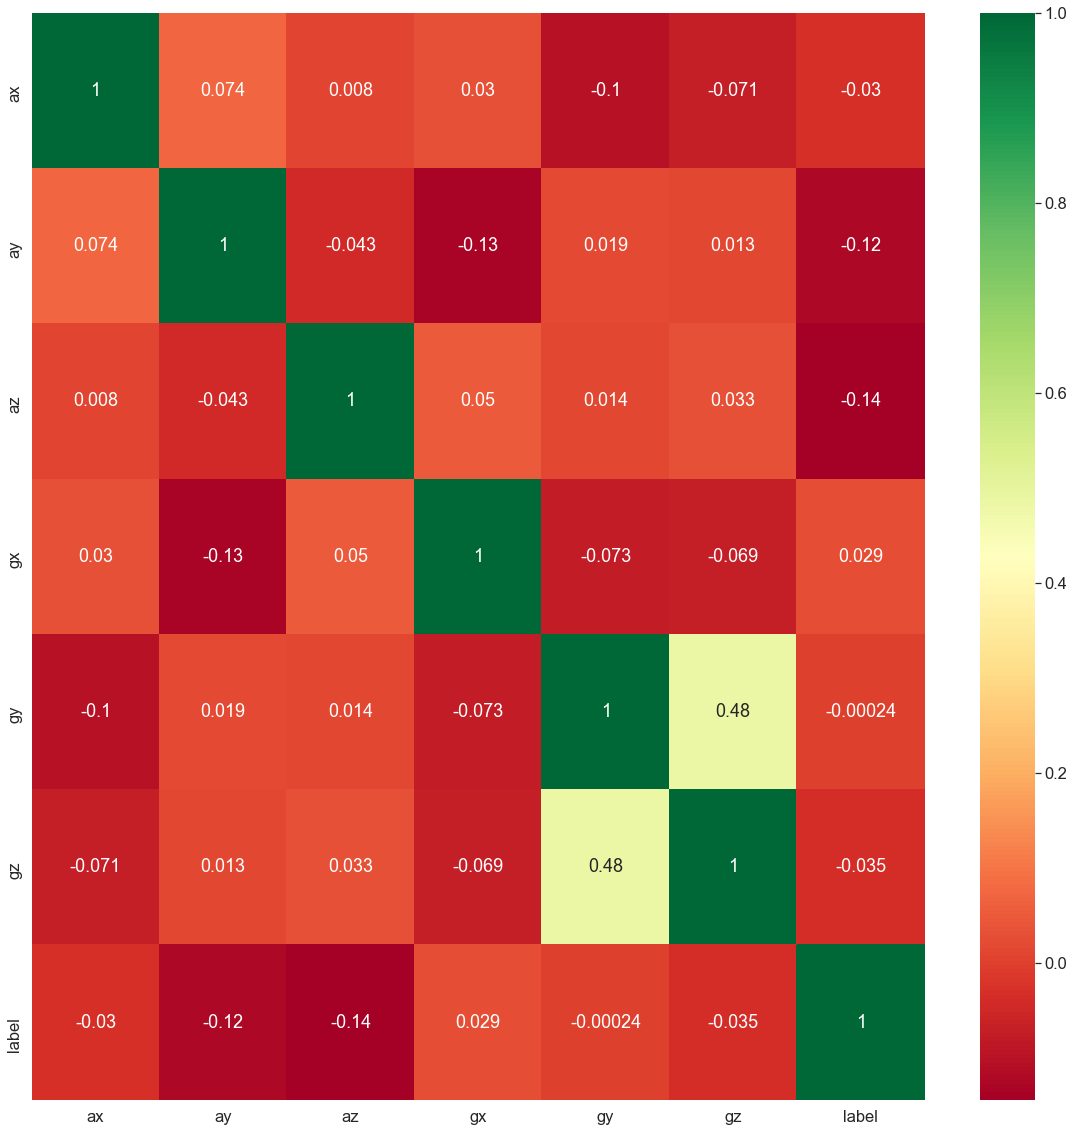

In [81]:
#get correlations of each features in dataset

corrmat = df_cor.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df_cor[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [82]:
num_feats= len(feature_name)
X.columns.tolist()

['ax', 'ay', 'az', 'gx', 'gy', 'gz']

In [83]:
def cor_selector(X, y,num_feats):
    cor_list = []
    feature_name = X.columns.tolist()
    
    # calculate the correlation with y for each feature
    for i in X.columns.tolist():
        cor = np.corrcoef(X[i], y)[0, 1]
        cor_list.append(cor)
        
    # replace NaN with 0
    cor_list = [0 if np.isnan(i) else i for i in cor_list]
    
    # feature name
    cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[-num_feats:]].columns.tolist()
   
    # feature selection? 0 for not select, 1 for select
    cor_support = [True if i in cor_feature else False for i in feature_name]

    return cor_support, cor_feature, cor_list

cor_support, cor_feature, cor_list = cor_selector(X, y,num_feats)
cor_val=[abs(x) for x in cor_list]
cor_result = dict(zip(cor_feature, cor_val))
myDict = {key:val for key, val in cor_result.items() if val > 0}
{k: v for k, v in sorted(myDict.items(),reverse=True, key=lambda item: item[1])}

{'ax': 0.1444416386343349,
 'gx': 0.12377753075947082,
 'az': 0.034731422762635,
 'gy': 0.02985424930025691,
 'gz': 0.02933976086454269,
 'ay': 0.00024428063028214086}

In [84]:
df_plot = copy.deepcopy(df)
df_plot.reset_index(inplace = True) 


       index        ax        ay        az        gx        gy        gz label
49000   1000  2.383251 -3.280560  5.084748  0.929266 -2.107638 -0.898738  fall
49001   1001  2.828317 -2.837888  4.445865  0.929266 -2.107638 -0.898738  fall
49002   1002  2.828317 -2.837888  4.445865  0.832798 -2.018497 -0.824250  fall
49003   1003  3.206382 -2.565106  4.098905  0.832798 -2.018497 -0.824250  fall
49004   1004  3.206382 -2.565106  4.098905  0.769300 -1.925692 -0.737551  fall
...      ...       ...       ...       ...       ...       ...       ...   ...
52995   4995  5.647061 -1.172483  9.391829 -0.384650  0.091583 -0.240559  fall
52996   4996  5.647061 -1.172483  9.391829 -0.359007  0.048844 -0.221021  fall
52997   4997  5.486743 -0.674776  9.542577 -0.359007  0.048844 -0.221021  fall
52998   4998  5.486743 -0.674776  9.542577 -0.144091 -0.059834 -0.205147  fall
52999   4999  6.027520 -0.270389  9.662218 -0.144091 -0.059834 -0.205147  fall

[4000 rows x 8 columns]
fall


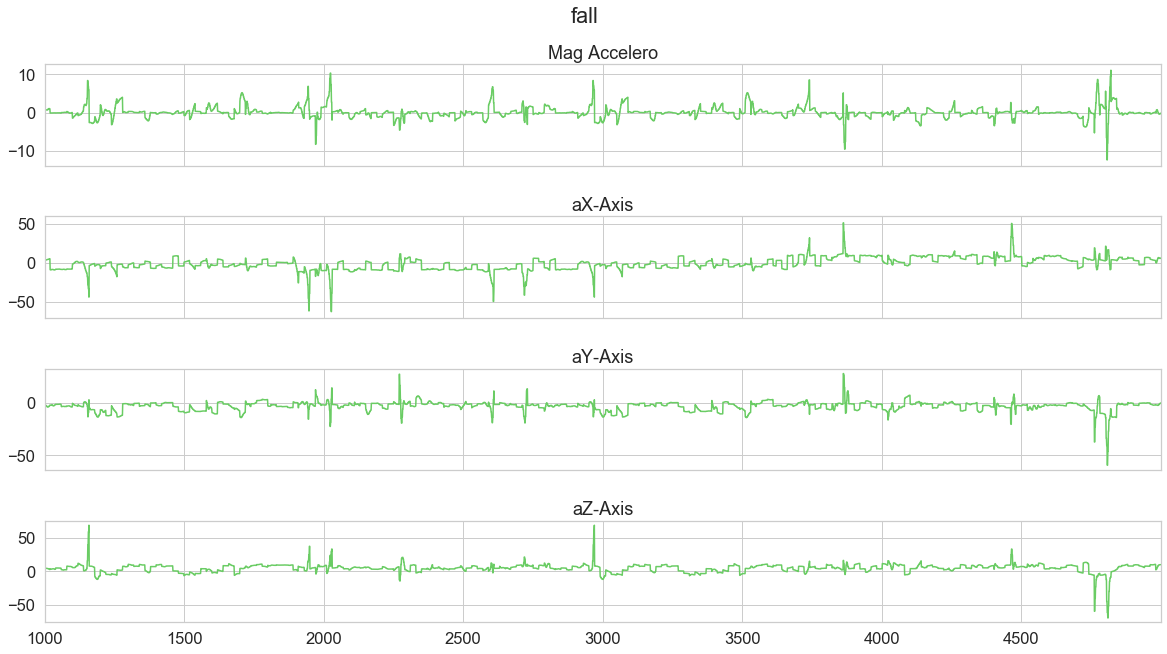

      index        ax        ay        az        gx        gy        gz  label
1000   1000  9.760324  0.236889  1.165305 -0.003663  0.014653 -0.017096  stand
1001   1001  9.786645  0.200997  1.189233 -0.003663  0.014653 -0.017096  stand
1002   1002  9.786645  0.200997  1.189233 -0.006106  0.019538 -0.018317  stand
1003   1003  9.743574  0.215354  1.162912 -0.006106  0.019538 -0.018317  stand
1004   1004  9.743574  0.215354  1.162912 -0.006106  0.019538 -0.021980  stand
...     ...       ...       ...       ...       ...       ...       ...    ...
4995   4995  9.896714  0.196211  1.019342  0.017096  0.002442 -0.004884  stand
4996   4996  9.894321  0.246461  0.990629  0.017096  0.002442 -0.004884  stand
4997   4997  9.894321  0.246461  0.990629  0.017096 -0.001221 -0.003663  stand
4998   4998  9.863214  0.253639  1.002593  0.017096 -0.001221 -0.003663  stand
4999   4999  9.863214  0.253639  1.002593  0.013432 -0.002442 -0.001221  stand

[4000 rows x 8 columns]
stand


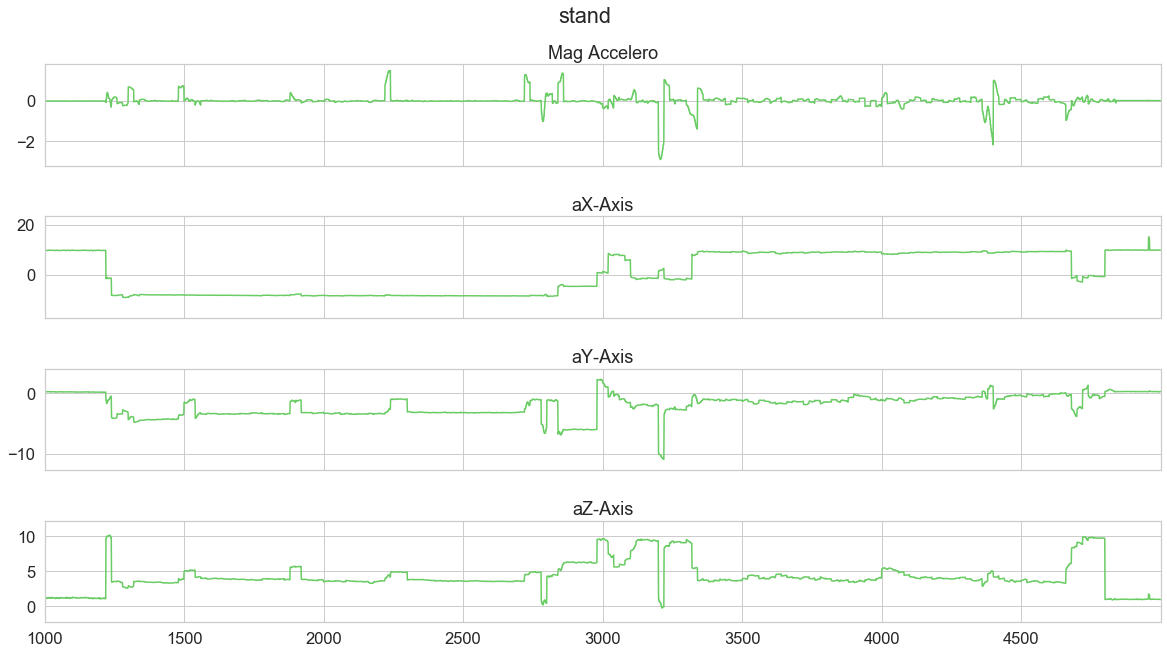

       index        ax        ay        az        gx        gy        gz label
33000   1000  8.128419 -1.289731  5.388637 -0.014653  0.008548 -0.006106  jump
33001   1001  8.102098 -1.256232  5.347959 -0.014653  0.008548 -0.006106  jump
33002   1002  8.102098 -1.256232  5.347959 -0.021980  0.007327 -0.007327  jump
33003   1003  8.116454 -1.256232  5.359923 -0.021980  0.007327 -0.007327  jump
33004   1004  8.116454 -1.256232  5.359923 -0.029307  0.007327 -0.014653  jump
...      ...       ...       ...       ...       ...       ...       ...   ...
36995   4995  8.963513 -0.765703  6.482157 -1.342001  1.860973 -0.241780  jump
36996   4996  8.963513 -0.765703  6.482157 -1.306589  1.922029 -0.284519  jump
36997   4997  9.131011 -1.009771  5.998807 -1.306589  1.922029 -0.284519  jump
36998   4998  9.131011 -1.009771  5.998807 -1.268735  1.983085 -0.305278  jump
36999   4999  9.432507 -1.098306  5.522635 -1.268735  1.983085 -0.305278  jump

[4000 rows x 8 columns]
jump


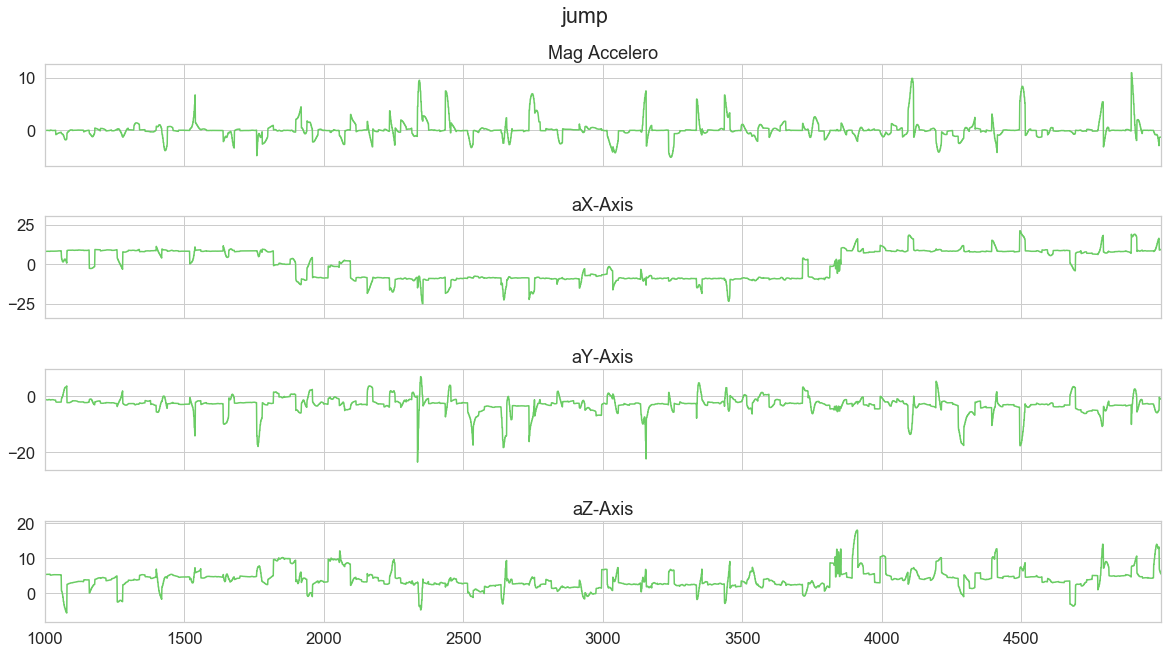

       index        ax        ay        az        gx        gy        gz label
17000   1000 -8.027920 -2.713461  3.936193 -0.039076  0.089141  0.136764  walk
17001   1001 -8.013563 -2.713461  3.945765 -0.039076  0.089141  0.136764  walk
17002   1002 -8.013563 -2.713461  3.945765 -0.031749  0.090362  0.201483  walk
17003   1003 -8.032705 -2.758925  3.960121 -0.031749  0.090362  0.201483  walk
17004   1004 -8.032705 -2.758925  3.960121 -0.025643  0.096468  0.250328  walk
...      ...       ...       ...       ...       ...       ...       ...   ...
20995   4995  9.135797 -3.512664  3.491128  0.118448  0.043960  1.078241  walk
20996   4996  9.087940 -3.426522  3.570092  0.118448  0.043960  1.078241  walk
20997   4997  9.087940 -3.426522  3.570092  0.059834  0.065940  1.058703  walk
20998   4998  9.008977 -3.282953  3.625126  0.059834  0.065940  1.058703  walk
20999   4999  9.008977 -3.282953  3.625126  0.001221  0.089141  1.028176  walk

[4000 rows x 8 columns]
walk


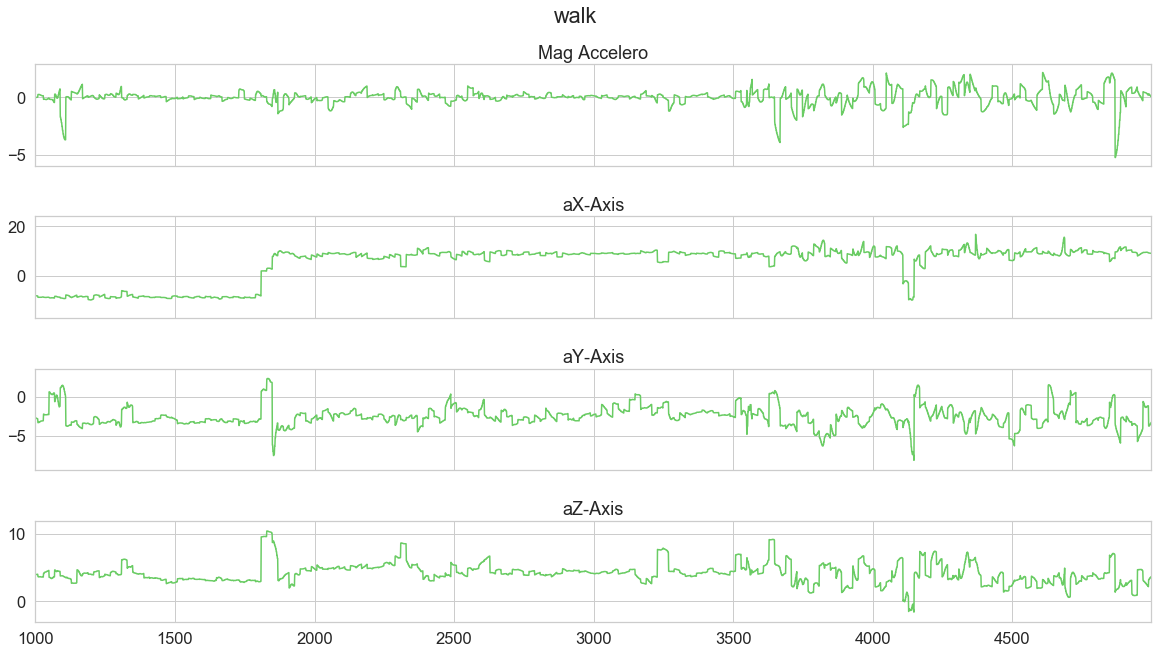

In [85]:
activities = df_plot['label'].value_counts().index
def plot_activity(activity, data):
    fig, (ax0, ax1, ax2,ax3) = plt.subplots(nrows=4, figsize=(20, 10), sharex=True)
    plot_axis(ax0, data['index'], data['gx'], 'Mag Accelero')
    plot_axis(ax1, data['index'], data['ax'], 'aX-Axis')
    plot_axis(ax2, data['index'], data['ay'], 'aY-Axis')
    plot_axis(ax3, data['index'], data['az'], 'aZ-Axis')
    plt.subplots_adjust(hspace=0.5)
    fig.suptitle(activity)
    plt.subplots_adjust(top=0.90)
    plt.show()

def plot_axis(ax, x, y, title):
    ax.plot(x, y, 'g')
    ax.set_title(title)
#     ax.xaxis.set_visible(False)
    ax.set_ylim([min(y) - np.std(y), max(y) + np.std(y)])
    ax.set_xlim([min(x), max(x)])
    ax.grid(True)
    
Fs=200
for activity in activities:
    data_for_plot = df_plot[(df_plot['label'] == activity)][1000:5000]
    print(data_for_plot)
    print(activity)
    plot_activity(activity, data_for_plot)

# Split training and testing data

In [86]:
def train_test_split(label, ratio):
    split_point = int(len(df[df.label == label]) * ratio)
    return (df[df.label == label].iloc[:split_point, :], df[df.label == label].iloc[split_point:, :])

split_ratio = 0.7
train_data = pd.DataFrame([])
test_data = pd.DataFrame([])

for i in range(len(interesting_labels)):
    (train, test) = train_test_split(interesting_labels[i], split_ratio)
    train_data = pd.concat([train_data, train])
    test_data = pd.concat([test_data, test])

#print("Number of train samples/label: ", len(train_stand))
#print("Number of test samples/label: ", len(test_stand))

# train_data = train_data.iloc[18:,]
# test_data = test_data.iloc[74:,]
print("Number of train samples: ", len(train_data))
print("Number of test samples: ", len(test_data))

#train_label = train_data.iloc[:, 12]
#test_label = test_data.iloc[:, 12]
#train_label = train_label.to_frame()
#test_label = test_label.to_frame()

train_label = train_data['label'].to_frame()
test_label = test_data['label'].to_frame()

Number of train samples:  44800
Number of test samples:  19200


# Data Segmentation (Sliding Window)

In [87]:
N_TIME_STEPS = 125 #sliding window length
STEP = 25 #Sliding window step size
N_FEATURES = 6

def generate_sequence(x, y, n_time_steps, step):
    
    segments = []
    labels = []
    for i in range(0, len(x) - n_time_steps, step):
        ax = x['ax'].values[i: i + n_time_steps]
        ay = x['ay'].values[i: i + n_time_steps]
        az = x['az'].values[i: i + n_time_steps]

#         lx = x['lx'].values[i: i + n_time_steps]
#         ly = x['ly'].values[i: i + n_time_steps]
#         lz = x['lz'].values[i: i + n_time_steps]
        gx = x['gx'].values[i: i + n_time_steps]
        gy = x['gy'].values[i: i + n_time_steps]
        gz = x['gz'].values[i: i + n_time_steps]

# #         mx = x['mx'].values[i: i + n_time_steps]
# #         my = x['my'].values[i: i + n_time_steps]
# #         mz = x['mz'].values[i: i + n_time_steps]
        
#         ma =  x['ma'].values[i: i + n_time_steps]
#         mg =  x['mg'].values[i: i + n_time_steps]
#         ml =  x['ml'].values[i: i + n_time_steps]
#         mm =  x['mm'].values[i: i + n_time_steps]
                
       
        label = stats.mode(y['label'][i: i + n_time_steps])[0][0]
#         segments.append([ax, ay, az, gx, gy, gz, lx, ly, lz, mx, my, mz, ma, mg, ml, mm])
#         segments.append([ax, ay, az, gx, gy, gz, mx, my, mz])
        segments.append([ax, ay, az, gx, gy, gz])
        labels.append(label)
        
    return segments, labels

train_X, train_y = generate_sequence(train_data, train_label, N_TIME_STEPS, STEP)
test_X, test_y = generate_sequence(test_data, test_label, N_TIME_STEPS, STEP)

In [88]:
# reshape input segments and one-hot encode labels
def reshape_segments(x, y, n_time_steps, n_features):
    
    x_reshaped = np.asarray(x, dtype= np.float32).reshape(-1, n_time_steps, n_features)
    y_reshaped = np.asarray(pd.get_dummies(y), dtype = np.float32)
    return x_reshaped, y_reshaped

X_train, y_train = reshape_segments(train_X, train_y, N_TIME_STEPS, N_FEATURES)
X_test, y_test = reshape_segments(test_X, test_y, N_TIME_STEPS, N_FEATURES)

In [89]:
y_test

array([[0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.]], dtype=float32)

# Import DL Library

In [90]:
from keras.regularizers import l2
from keras.models import Sequential
from keras.layers import Dense, LSTM, Flatten, Bidirectional
from tensorflow.keras.layers import Attention
from keras.layers import Conv2D, MaxPooling2D, Dropout
from keras import optimizers
from keras import backend as K
from tensorflow.python.tools import freeze_graph
from tensorflow.python.tools import optimize_for_inference_lib

N_CLASSES = 4
N_HIDDEN_UNITS = 64
L2 = 0.000001

# LSTM Model (Training) 

In [91]:
class attention():
    
    def __init__(self, return_sequences=True):
        self.return_sequences = return_sequences
        super(attention,self).__init__()
        
    def build(self, input_shape):
        
        self.W=self.add_weight(name="att_weight", shape=(input_shape[-1],1),
                               initializer="normal")
        self.b=self.add_weight(name="att_bias", shape=(input_shape[1],1),
                               initializer="zeros")
        
        super(attention,self).build(input_shape)
        
    def call(self, x):
        
        e = K.tanh(K.dot(x,self.W)+self.b)
        a = K.softmax(e, axis=1)
        output = x*a
        
        if self.return_sequences:
            return output
        
        return K.sum(output, axis=1)

In [ ]:
# LSTM model
from keras.backend import clear_session

clear_session()
model = Sequential()
# model.add(Embedding(max_words, emb_dim, input_length=max_len))
# model.add(attention(return_sequences=True)) # receive 3D and output 3D
model.add(LSTM(64, return_sequences=True, input_shape=(N_TIME_STEPS, N_FEATURES), 
         kernel_initializer='orthogonal', kernel_regularizer=l2(L2), recurrent_regularizer=l2(L2),
         bias_regularizer=l2(L2), name="LSTM_1"))
# model.add(Dropout(0.2))

model.add(Bidirectional(LSTM(32, return_sequences=True)))

# model.add(LSTM(32, return_sequences=True))

# model.add(Bidirectional(LSTM(16, return_sequences=True)))

model.add(Flatten(name='Flatten'))
model.add(Dense(N_HIDDEN_UNITS, activation='relu', kernel_regularizer=l2(L2), bias_regularizer=l2(L2), name="Dense_1"))
model.add(Dense(N_CLASSES, activation='softmax', kernel_regularizer=l2(L2), bias_regularizer=l2(L2), name="Dense_2"))

#     LSTM(N_HIDDEN_UNITS, return_sequences=True, input_shape=(N_TIME_STEPS, N_FEATURES), 
#          kernel_initializer='orthogonal', kernel_regularizer=l2(L2), recurrent_regularizer=l2(L2),
#          bias_regularizer=l2(L2), name="LSTM_1"),
#     LSTM(N_HIDDEN_UNITS, return_sequences=True, input_shape=(N_TIME_STEPS, N_FEATURES), 
#          kernel_initializer='orthogonal', kernel_regularizer=l2(L2), recurrent_regularizer=l2(L2),
#          bias_regularizer=l2(L2), name="LSTM_2"),
#     Dropout(0.2),
#     Flatten(name='Flatten'),
#     Dense(N_HIDDEN_UNITS, activation='relu', kernel_regularizer=l2(L2), bias_regularizer=l2(L2), name="Dense_1"),
#     Dense(N_CLASSES, activation='softmax', kernel_regularizer=l2(L2), bias_regularizer=l2(L2), name="Dense_2")
# ])

# model = Sequential([
#     LSTM(N_HIDDEN_UNITS, return_sequences=True, input_shape=(N_TIME_STEPS, N_FEATURES), name="LSTM_1"),
#      LSTM(N_HIDDEN_UNITS, return_sequences=True, input_shape=(N_TIME_STEPS, N_FEATURES), name="LSTM_2"),
#     Flatten(name='Flatten'),
#     Dense(N_HIDDEN_UNITS, activation='relu', name="Dense_1"),
#     Dense(N_CLASSES, activation='softmax', name="Dense_2")
# ])

model.summary()

opt = optimizers.RMSprop(lr=0.0001)

model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

BATCH_SIZE =64
N_EPOCHS = 20

lstm = model.fit(X_train, y_train,
          batch_size=BATCH_SIZE, epochs=N_EPOCHS,
          validation_data=(X_test, y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
LSTM_1 (LSTM)                (None, 125, 64)           18176     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 125, 64)           24832     
_________________________________________________________________
lstm_2 (LSTM)                (None, 125, 32)           12416     
_________________________________________________________________
bidirectional_2 (Bidirection (None, 125, 32)           6272      
_________________________________________________________________
Flatten (Flatten)            (None, 4000)              0         
_________________________________________________________________
Dense_1 (Dense)              (None, 64)                256064    
_________________________________________________________________
Dense_2 (Dense)              (None, 4)                 260       
Total para

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

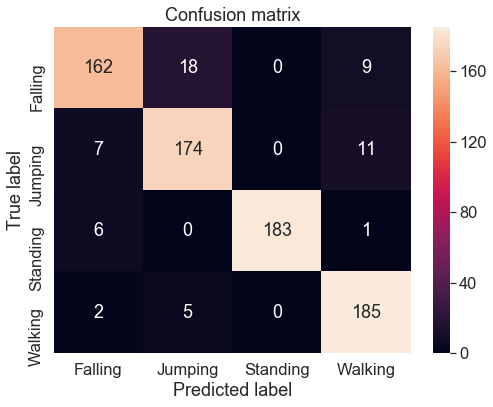

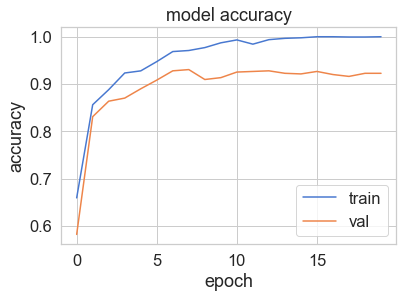

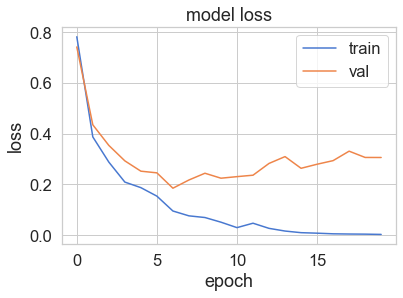

In [94]:
# use LSTM model to predict

y_pred_ohe = model.predict(X_test)
y_pred_labels = np.argmax(y_pred_ohe, axis=1)
y_true_labels = np.argmax(y_test, axis=1)
confusion_matrix = metrics.confusion_matrix(y_true=y_true_labels, y_pred=y_pred_labels)
print(y_true_labels)
LABELS = [ 'Falling','Jumping','Standing','Walking']

plt.figure(figsize=(8, 6))
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
sns.heatmap(confusion_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True label')
# plt.ylim((16,14))
plt.xlabel('Predicted label')
plt.show();

plt.plot(lstm.history['acc'])
plt.plot(lstm.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='best')
plt.show()

plt.plot(lstm.history['loss'])
plt.plot(lstm.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='best')
plt.show()

# Save the model into .pb file

In [26]:
# N_TIME_STEPS = 100 #sliding window length
# STEP = 20 #Sliding window step size
# N_FEATURES = 8


In [95]:
# Save LSTM model

output_node_name = "Dense_2/Softmax"
MODEL_LSTM = str(N_TIME_STEPS)+"_"+str(STEP)+"_"+str(N_FEATURES)+"_"+str(N_CLASSES)+"_nomagnew"

tf.train.write_graph(K.get_session().graph_def, './models/LSTM/', \
        MODEL_LSTM + '_graph.pbtxt')
saver = tf.train.Saver()
saver.save(K.get_session(), './models/LSTM/' + MODEL_LSTM + '.chkp')

freeze_graph.freeze_graph('./models/LSTM/' +MODEL_LSTM+ '_graph.pbtxt', None, \
    False, './models/LSTM/' + MODEL_LSTM+ '.chkp', output_node_name, \
    "save/restore_all", "save/Const:0", \
    './models/LSTM/' +MODEL_LSTM + '.pb', True, "")



INFO:tensorflow:Restoring parameters from ./models/LSTM/125_25_6_4_nomagnew.chkp
INFO:tensorflow:Froze 13 variables.
INFO:tensorflow:Converted 13 variables to const ops.


node {
  name: "LSTM_1_input"
  op: "Placeholder"
  attr {
    key: "dtype"
    value {
      type: DT_FLOAT
    }
  }
  attr {
    key: "shape"
    value {
      shape {
        dim {
          size: -1
        }
        dim {
          size: 125
        }
        dim {
          size: 6
        }
      }
    }
  }
}
node {
  name: "LSTM_1/kernel"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_FLOAT
    }
  }
  attr {
    key: "value"
    value {
      tensor {
        dtype: DT_FLOAT
        tensor_shape {
          dim {
            size: 6
          }
          dim {
            size: 256
          }
        }
        tensor_content: "\301\204X=P\236<\274%\206C=\374%f\275\276a\321=\360[h\275\375\252\257\275\013k\220=\364\237}<y\237\000\276a\223\200\275#H\271\275\017I\222\275vb\356\274x/\203>\333Q\204\275]\220\033\276$|\030\275\323|\223\274P\013\203=E\221t\275\363\3022\276\314\007\350=\333(\236\275%Ay=\243\312#\274&q\024=\333\353\213\275hb#\275](\347=2\366d=\006P

# CNN Model 

In [ ]:
# from keras.backend import clear_session

# clear_session()
# # CNN model

# model = Sequential()

# model.add(Conv2D(N_HIDDEN_UNITS * 3, kernel_size = 3, input_shape = (X_train.shape[1], X_train.shape[2], 1), padding = 'same',
#                  activation = 'relu', name="Conv2D_Layer1"))
# model.add(Conv2D(N_HIDDEN_UNITS * 2, kernel_size = 3, padding = 'same', activation = 'relu', name="Conv2D_Layer2"))
# model.add(Conv2D(N_HIDDEN_UNITS, kernel_size = 3, padding = 'same', activation = 'relu', name="Conv2D_Layer3"))
# model.add(Flatten(name="Flatten_Layer"))
# model.add(Dense(N_CLASSES, activation = 'softmax', name="CNN_output"))

# model.summary()

# model.compile(optimizer='Adam',
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])

# BATCH_SIZE = 24
# N_EPOCHS = 100

# cnn = model.fit(np.expand_dims(X_train, axis=-1), y_train,
#                 batch_size=BATCH_SIZE, epochs=N_EPOCHS,
#                 validation_data=(np.expand_dims(X_test, axis=-1), y_test))

In [ ]:
# model.save("model_har.h5")

In [ ]:
# y_pred_ohe = model.predict(np.expand_dims(X_test, axis=-1))
# y_pred_labels = np.argmax(y_pred_ohe, axis=1)
# y_true_labels = np.argmax(y_test, axis=1)
# confusion_matrix = metrics.confusion_matrix(y_true=y_true_labels, y_pred=y_pred_labels)

# LABELS = [ 'standing', 'walking']

# plt.figure(figsize=(8, 6))
# sns.set(style='whitegrid', palette='muted', font_scale=1.5)
# sns.heatmap(confusion_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
# plt.title("CNN Result Confusion Matrix")
# plt.ylabel('True label')
# # plt.ylim((16,14))
# plt.xlabel('Predicted label')
# plt.show();

# plt.plot(cnn.history['acc'])
# plt.plot(cnn.history['val_acc'])
# plt.title('CNN model accuracy')
# plt.ylabel('accuracy')
# plt.xlabel('epoch')
# plt.legend(['train', 'val'], loc='best')
# plt.show()

# plt.plot(cnn.history['loss'])
# plt.plot(cnn.history['val_loss'])
# plt.title('CNN model loss')
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.legend(['train', 'val'], loc='best')
# plt.show()

# Save model to .pb file

In [ ]:
# # Save CNN model
# output_node_name = "CNN_output/Softmax"
# MODEL_NAME = "2020_02_09_CNN"

# tf.train.write_graph(K.get_session().graph_def, './models/CNN/', \
#         MODEL_NAME + '_graph.pbtxt')
# saver = tf.train.Saver()
# saver.save(K.get_session(), './models/CNN/' + MODEL_NAME + '.chkp')

# freeze_graph.freeze_graph('./models/CNN/' + MODEL_NAME + '_graph.pbtxt', None, \
#     False, './models/CNN/' + MODEL_NAME + '.chkp', output_node_name, \
#     "save/restore_all", "save/Const:0", \
#     './models/CNN/' + MODEL_NAME + '.pb', True, "")

# Convert .pb to tflite

In [ ]:
# import tensorflow as tf
# # model_dir='./models/CNN/2020_02_09_CNN.pb'
# model_dir='model_har.h5'

# input_arrays = ['Conv2D_Layer1_input']
# output_arrays = ['CNN_output/Softmax']

# tfc = tf.lite.TFLiteConverter.from_keras_model_file(model_dir)
# # converter =  tfc.from_keras_model_file(model_dir, input_arrays, output_arrays)

# tflite_model = tfc.convert()
# open("CNN_model.tflite","wb").write(tflite_model)

# Make sure the model output and input name

In [ ]:
# import tensorflow as tf
# gf = tf.GraphDef()   
# m_file = open(r"D:\Human Activity Recognition\Training\models\LSTM\100_12_walk_stand.pb",'rb')
# gf.ParseFromString(m_file.read())

# with open('somefile.txt', 'a') as the_file:
#     for n in gf.node:
#         the_file.write(n.name+'\n')

# file = open('somefile.txt','r')
# data = file.readlines()
# print ("output name = ")
# print (data[len(data)-1])

# print ("Input name = ")
# file.seek ( 0 )
# print (file.readline())